In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/CNN_assignment'

train_dir = f'{base_dir}/Train'
test_dir = f'{base_dir}/Test'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_size = (180, 180)

# Training data generator with rescaling and validation split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Test data generator with rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for the train generator
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,  # Use the same directory, but the data generator will split it
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset for the validation generator
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')  # Assuming you have 9 classes
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/20
57/57 [==============================] - 373s 7s/step - loss: 2.2666 - accuracy: 0.2056 - val_loss: 1.9487 - val_accuracy: 0.2500
Epoch 2/20
57/57 [==============================] - 37s 647ms/step - loss: 1.8707 - accuracy: 0.3036 - val_loss: 1.7226 - val_accuracy: 0.3739
Epoch 3/20
57/57 [==============================] - 35s 607ms/step - loss: 1.5272 - accuracy: 0.4752 - val_loss: 1.6856 - val_accuracy: 0.4077
Epoch 4/20
57/57 [==============================] - 32s 561ms/step - loss: 1.4086 - accuracy: 0.5097 - val_loss: 1.7051 - val_accuracy: 0.4369
Epoch 5/20
57/57 [==============================] - 34s 595ms/step - loss: 1.3636 - accuracy: 0.5198 - val_loss: 1.6928 - val_accuracy: 0.4527
Epoch 6/20
57/57 [==============================] - 35s 607ms/step - loss: 1.2083 - accuracy: 0.5682 - val_loss: 1.7810 - val_accuracy: 0.4505
Epoch 7/20
57/57 [==============================] - 35s 609ms/step - loss: 1.1452 - accuracy: 0.5994 - val_loss: 1.6830 - val_accuracy: 0.4955
E

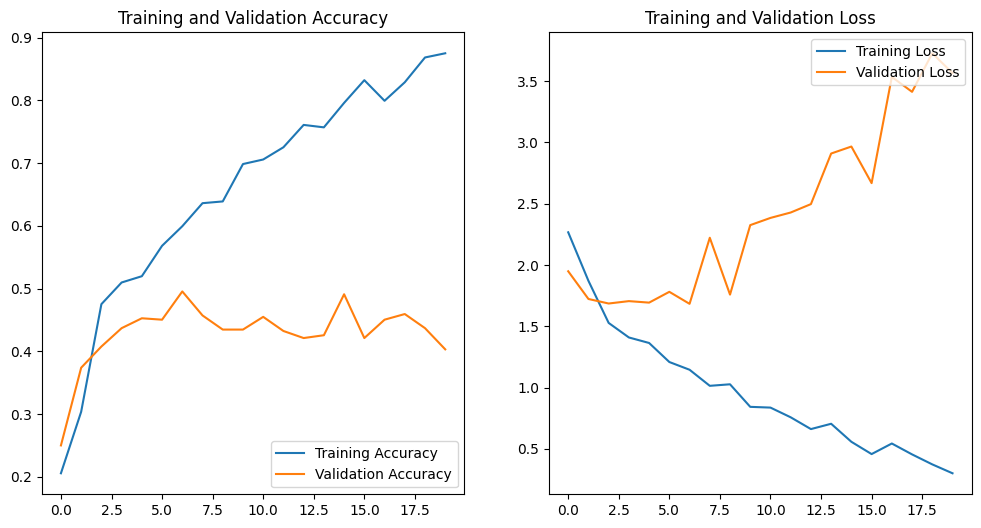

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.2),  # Dropout layer after pooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),  # Another dropout layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout before the final dense layer
    Dense(9, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Use the same ImageDataGenerator instance for the training generator but without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Reinitialize the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
epochs = 30  # Increase if underfitting; adjust based on your observation
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/30
70/70 [==============================] - 85s 1s/step - loss: 2.7163 - accuracy: 0.1827 - val_loss: 2.2020 - val_accuracy: 0.1102
Epoch 2/30
70/70 [==============================] - 55s 786ms/step - loss: 1.9513 - accuracy: 0.2769 - val_loss: 2.0894 - val_accuracy: 0.2119
Epoch 3/30
70/70 [==============================] - 55s 785ms/step - loss: 1.7424 - accuracy: 0.3631 - val_loss: 2.0910 - val_accuracy: 0.3051
Epoch 4/30
70/70 [==============================] - 56s 803ms/step - loss: 1.6989 - accuracy: 0.3890 - val_loss: 2.1081 - val_accuracy: 0.3390
Epoch 5/30
70/70 [==============================] - 55s 784ms/step - loss: 1.6493 - accuracy: 0.3997 - val_loss: 2.1546 - val_accuracy: 0.2542
Epoch 6/30
70/70 [==============================] - 55s 785ms/step - loss: 1.5936 - accuracy: 0.4305 - val_loss: 2.1229 - val_accuracy: 0.2542
Epoch 7/30
70/70 [==============================] - 55s 782ms/step - loss: 1.5505 - accuracy: 0.4605 - val_loss: 2.0835 - val_accuracy: 0.2966
Ep

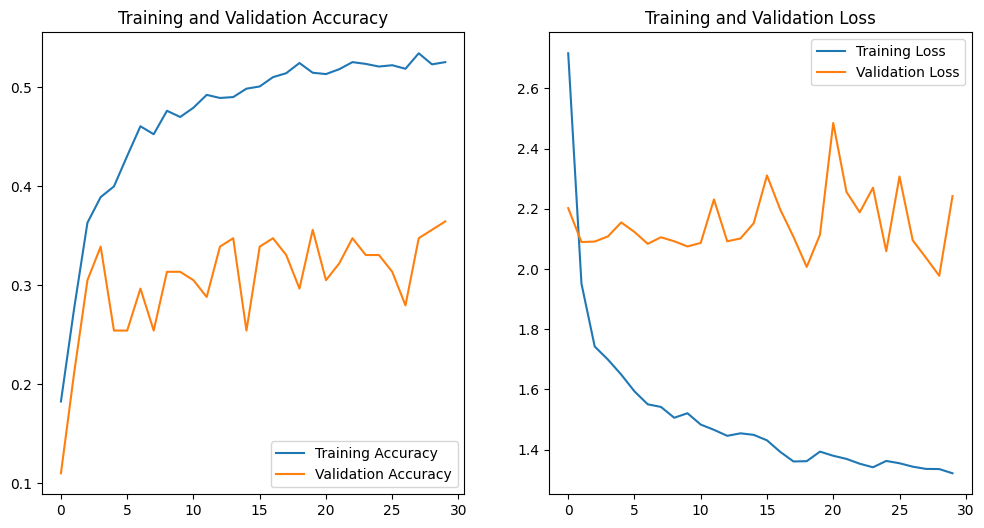

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


The two sets of graphs you've provided illustrate the training and validation accuracy, as well as the training and validation loss for a machine learning model over a number of epochs.

For the first image, the model has relatively low training accuracy that increases gradually, reaching just over 0.5 (50%) by epoch 30. The validation accuracy, however, is much lower and does not improve significantly, fluctuating around 0.3 (30%). This discrepancy suggests that the model may not generalize well to new data and could be overfitting to the training data.

The training loss decreases sharply at first and then continues to decline more gradually, which is expected during training. The validation loss, however, does not decrease much and is quite volatile, which further supports the idea of overfitting or a model that doesn't perform well on the validation data.

For the second image, the training accuracy is much higher, reaching almost 0.9 (90%) by around epoch 18. The validation accuracy, however, starts around 0.3 (30%) and only increases slightly to about 0.5 (50%), indicating that the model performs well on the training data but significantly worse on the validation data.

The training loss for the second model decreases consistently, which is a good sign of learning. However, the validation loss, after initially decreasing, starts to increase, which can be a sign of overfitting past a certain point (around epoch 5).

In both cases, the models are showing signs of overfitting, as evidenced by higher performance on the training set compared to the validation set. This could be due to a number of factors, such as the model being too complex for the amount of training data, not enough regularization, or the training data not being representative of the general population of data the model is intended to work with. It is also notable that the second model's accuracy and loss graphs are for fewer epochs (up to 18) compared to the first (up to 30), which might indicate that the training was stopped earlier, potentially to avoid overfitting. However, the signs of overfitting are already apparent in the second model as well.

In conclusion, while the second set of graphs indicates a model that learns better (higher training accuracy and lower training loss), both models struggle with generalization as shown by the lower validation accuracy and higher validation loss. Adjustments in the models, such as simplifying the architecture, using dropout, adding more data, or implementing cross-validation, could potentially improve their performance.